<a href="https://colab.research.google.com/github/huda-nur-ed/AirBnB-Bookings-Analysis/blob/main/%5BEDA_ABTN0101%5D_F_M_Nurul_Huda_AirBnB_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

Dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

Explore and analyze the data to discover key understandings (not limited to these) such as : 

1.What can we learn about different hosts and areas?

2.What can we learn from predictions? (ex: locations, prices, reviews, etc)

3.Which hosts are the busiest and why?

4.Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset 'Airbnb NYC 2019.csv'
path = '/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 1/Capstone Project-[ABTN0101] AirBnB Bookings Analysis/Airbnb NYC 2019.csv'
df = pd.read_csv(path)

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Get a brief summary on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

##Cleaning the data

In [5]:
# Checking missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Removing columns that are not relevant viz.name,host_name,last_review as these these are unethical also.
df.drop(['id','host_name','last_review'],axis=1,inplace=True)
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [7]:
# Replacing missing values of column 'reviews_per_month' with zero to make data exploration easy.
df['reviews_per_month'].fillna(0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               48895 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [8]:
# Get a statistical summary on the dataset numeric columns
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


##Doing some analysis on hosts and areas of listings

In [9]:
# Find out the number of unique hosts
df['host_id'].nunique()

37457

It shows that some hosts post listings more than one.

In [10]:
# Get the maximum number of listings posted by a host
df.groupby('host_id')['name'].count().max()

327

In [11]:
# Get the top 5 hosts that posts maximum number of listings
listing_count_df = df['host_id'].value_counts().reset_index().rename(columns={'index':'host_id','host_id':'Number of listings'})
listing_count_df.head()

,host_id,Number of listings
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96


In [12]:
#  Get the 5 host_ids that posts minimum number of listings
listing_count_df.tail()

,host_id,Number of listings
37452,1641589,1
37453,4070519,1
37454,208106618,1
37455,235939247,1
37456,1288080,1


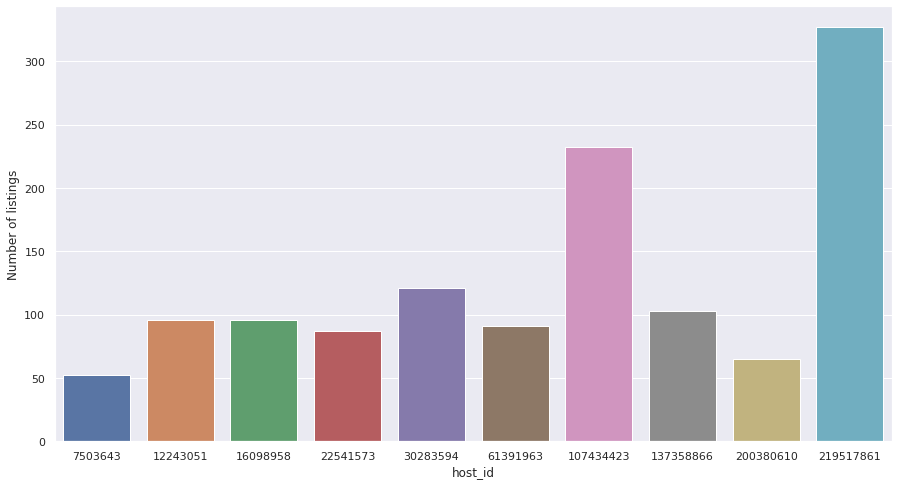

In [13]:
# Get visualizing the number of listings by top 10 host using bar plot.
sns.set(rc={'figure.figsize':(15,8)})
sns.barplot(data=listing_count_df.head(10),x ='host_id',y='Number of listings')

From the above chart, we can see that the top 10 hosts post listings of minimum 50 or more.4 hosts post with more than 100 listings.

In [14]:
# Get number of hosts that post only 1 listing.
len(listing_count_df[listing_count_df['Number of listings']==1])

32303

In [15]:
# Get total number of all listings posted by hosts.
listing_count_df['Number of listings'].sum()

48895

Here, we can conclude that the host with 'host_id'= 219517861 posted maximum listings. Also we can conclude that 32303 hosts post only 1 listings and they constitute 66% of all the listings.

In [16]:
# Get the mean and median number of listings posted by the hosts in the dataset
df['host_id'].value_counts().mean()

1.3053634834610353

In [17]:
df['host_id'].value_counts().median()

1.0

From the above, we can derive that the average postings by hosts in the dataset is 1.3 and their median is 1.

In [18]:
# Get the unique regions where listings are done.
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [19]:
# Get the number of listings in each area i.e. neighbourhood_group
neighbourhood_group_listing_df = df['neighbourhood_group'].value_counts().reset_index()
neighbourhood_group_listing_df.columns=['neighbourhood_group','Number of listings']
neighbourhood_group_listing_df

,neighbourhood_group,Number of listings
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


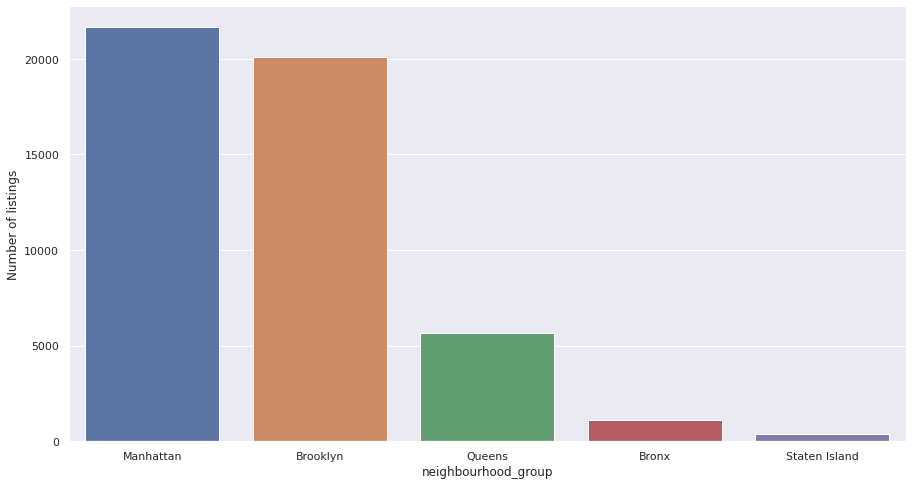

In [20]:
# Get a barplot of the listings distribution in each neighbourhood_group area.
sns.barplot(data=neighbourhood_group_listing_df,x ='neighbourhood_group',y='Number of listings')

From the above chart, we can see that the maximum listings are done in Manhattan and Brooklyn neighbourhood_group area.

In [24]:
# Get top 10 listings in neighbourhoods.
neighbourhood_listing_df = df['neighbourhood'].value_counts().reset_index().head(10)
neighbourhood_listing_df.columns=['neighbourhood','Number of listings']
neighbourhood_listing_df

,neighbourhood,Number of listings
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


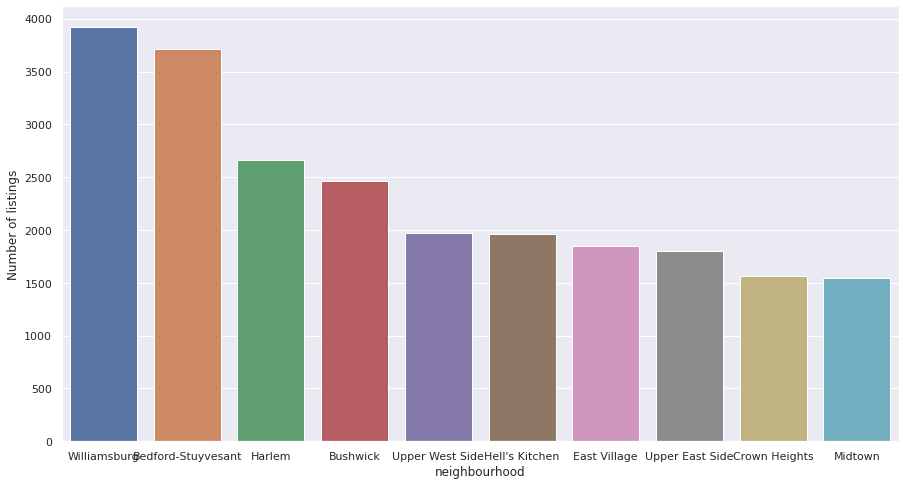

In [25]:
# Get a barplot of the listings distribution in each neighbourhood area.
sns.barplot(data=neighbourhood_listing_df,x ='neighbourhood',y='Number of listings')

From the above chart, we can conclude that in 4 neighbourhood, there are more than 2000 listings.

## Comparing listing prices across different neighbourhood-groups.

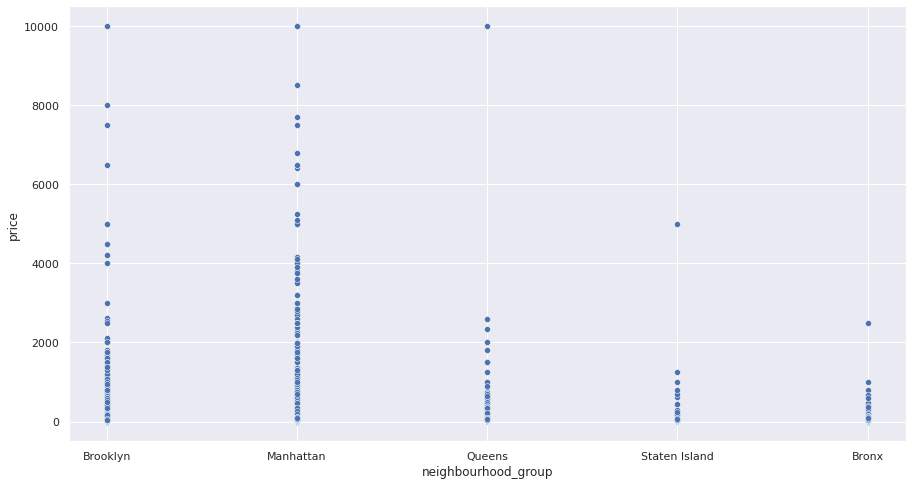

In [32]:
# Get a scatterplot of the listings price across neighbourhood-group area.
sns.scatterplot(data=df,x ='neighbourhood_group',y='price')

From the chart above we can see that,Manhattan is more expensive compared to other neighbourhood groups. Bronx is more cheaper.Most of the price range below 2000.

## Analysing the price ranges across different neighbourhood_grop with respect to room_type.

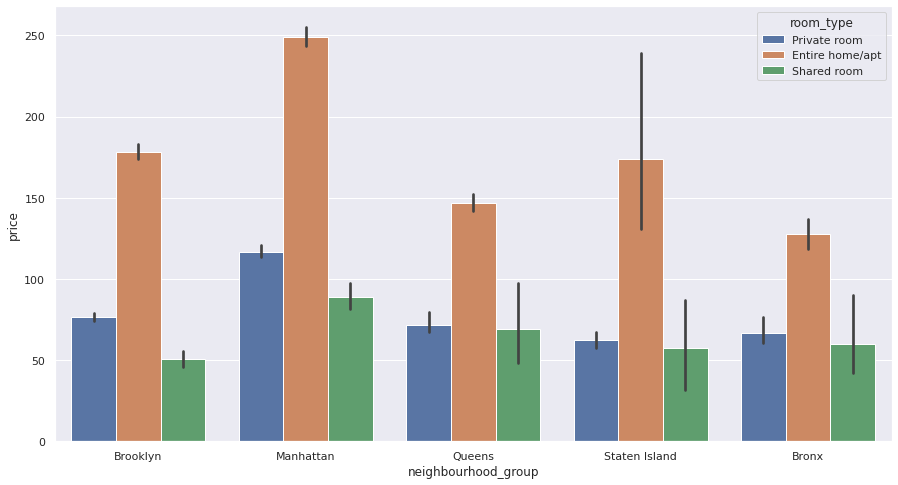

In [34]:
# Get a barplot of the listings price across neighbourhood_group area with respect to room_type.
sns.barplot(data=df,x ='neighbourhood_group',y='price',hue='room_type')

From the chart above, we can see that the price of Entire home/apt is more than other room types.Shared room type is less expensive.